### **THE BELOW ANALYSIS IS FOR DATASET WHICH CONTAINS VARIOUS FEATURES USING WHICH WE DETERMINE WHETHER A BODY ORBITING THE EARTH IS HAZARDOUS OR NOT**

In [2]:
import numpy as np  # Fundamental package for numerical operations on arrays
import pandas as pd  # Library for data manipulation and analysis using DataFrames

import matplotlib.pyplot as plt  # Plotting library for visualizing data
#%matplotlib inline  # Enables inline plotting in Jupyter notebooks

import seaborn as sns  # High-level interface for statistical data visualization
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings

warnings.filterwarnings("ignore")

In [3]:
NEO_data = pd.read_csv('Data/Nasa_Dataset.csv')

In [4]:
NEO_data.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [5]:
NEO_data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


**EACH ROW REPRESENTS A RECORD OF AN ORBITING BODY**  

**neo_id:** The id of the near earth object  

**name:** The name of the near earth object (possibly includes discovery year as well)  

**absolute_magnitude:** The brightness level of the near earth object  

**estimated_diameter_min & estimated_diameter_max:** The Maximum and minimum estimated diameter of the near earth object, mainly in KM  

**orbiting_body:** The celestial body that the NEO is orbiting, in this dataset its always Earth  

**relative_velocity:** The velocity at which NEO is travelling, relative to earth  

**miss_distance:** The distance by which the NEO will miss Earth  

**is_hazardous:** The target feature, A boolean value which may indicate the NEO as hazardous if true or not hazardous if false

In [6]:
NEO_data.tail()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False
338198,54460573,(2024 NH3),22.951,0.068290,0.152700,Earth,42060.357830,7.126682e+06,False


**WE CAN STATE THAT**  

is_hazardous is a binary/categorical feature having only 2 options  

absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity & miss_distance	are numeric features  

neo_id is a unique identifying feature as it identifies each NEO uniquely  

name is a text feature

In [7]:
NEO_data.shape

(338199, 9)

We have 338199 observations, each with 9 attributes out of which 8 are features and the last one is the target column/target feature.

In [8]:
NEO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


**orbiting_body & name** are of object data type  

**is_hazardous(target feature)** is boolean  

**neo_id** is integer  

while the remaining features are all float  


since data is required in numeric form   

the boolean values (true/false) can be found as (1/0)  

while for the object data type we can also label it using a number like 0

In [9]:
NEO_data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


| Row     | Meaning                                                                 |
|----------|-------------------------------------------------------------------------|
| **count** | Number of non-null entries (all 303, so no missing values).             |
| **mean**  | Average value for each column.                                           |
| **std**   | Standard deviation (how spread out the data is from the mean).           |
| **min**   | Minimum value in the column.                                             |
| **25%**   | First quartile (25% of data is below this value).                        |
| **50%**   | Median (middle value).                                                   |
| **75%**   | Third quartile (75% of data is below this value).                        |
| **max**   | Maximum value in the column.                                             |

In [10]:
print("Hazardous median:", NEO_data['is_hazardous'].median())

Hazardous median: 0.0


## **FALSE = NOT HAZARDOUS**  

## **TRUE = HAZARDOUS**

**EXAMPLE INSIGHTS**  

The absolute magnitude of objects ranges from 18.5 to 22.7, with an average around 20.5, suggesting varying brightness and size.  

The minimum estimated diameters range from 0.07 to 0.53 , and maximum estimated diameters go up to 1.18 showing a wide size distribution.  

Relative velocities range between 24,865 to 109,950 km/h, and miss distances vary greatly, from 30 million km to 67 million km.  

From the median in the previous cell, its clear that more then 50% of the NEO's are not hazardous.

In [11]:
print(NEO_data['is_hazardous'].value_counts())

is_hazardous
False    295037
True      43162
Name: count, dtype: int64


**BALANCE RATIO OF DATASET**  

TRUE : FALSE  

13% : 87%  
This tells us that the dataset is severely imbalanced as its majorly dominated by the **FALSE** class
So we need to decide between oversampling & Undersampling

**Deciding Between OverSampling & Undersampling**

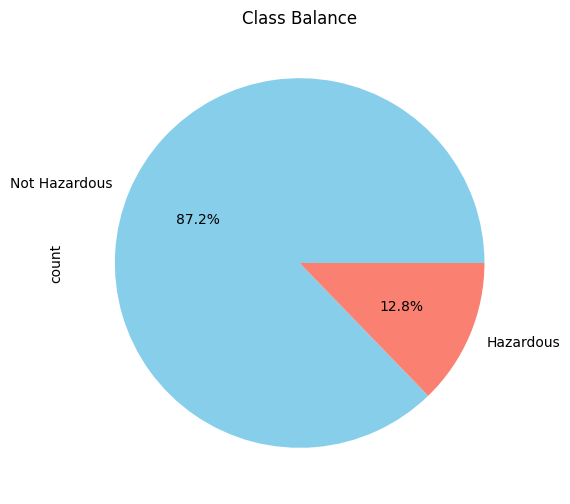

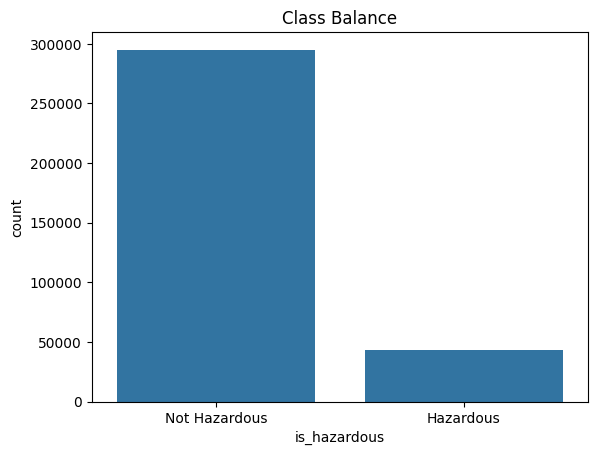

In [15]:
NEO_data["is_hazardous"].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Not Hazardous', 'Hazardous'],
    colors=['skyblue','salmon'],
    figsize=(6,6)
)
plt.title("Class Balance")
plt.show()

sns.countplot(x="is_hazardous", data=NEO_data)
plt.xticks([0,1], ["Not Hazardous", "Hazardous"])
plt.title("Class Balance")
plt.show()

OverSampling the **TRUE** class is more ideal for this dataset as undersampling the other class  
could lead to the removal of some important data

In [28]:
NEO_data.pivot_table(values=
                        ['absolute_magnitude',
                         'estimated_diameter_min',
                         'estimated_diameter_max',
                         'relative_velocity',
                         'miss_distance'], index='is_hazardous', aggfunc='mean')

,absolute_magnitude,estimated_diameter_max,estimated_diameter_min,miss_distance,relative_velocity
is_hazardous,,,,,
False,23.315579,0.308624,0.138021,4.158731e+07,49172.265510
True,20.314378,0.655353,0.293083,4.118015e+07,63968.941094


**Feature By Feature Insights Using Mean Along With Target Feature**  

**absolute_magnitude**:  
                    Mean(is_hazardous = False)= 23.3  
                    Mean(is_hazardous = True)= 20.3  
                    Insight: Hazardous NEOs tend to have a lower absolute magnitude,which means they are brighter and possibly larger in size.  
**estimated_diameter_max**:  
                    Mean(is_hazardous = False)= 0.3  
                    Mean(is_hazardous = True)= 0.65  
                    Insight: Hazardous NEOs are, larger in diameter, indicating that size contributes to Hazard Potential.   
**estimated_diameter_min**:  
                    Mean(is_hazardous = False)= 0.13  
                    Mean(is_hazardous = True)= 0.29  
                    Insight: Even the smallest estimated size of hazardous NEOs is roughly double that of non-hazardous ones.  
**miss_distance**:  
                    Mean(is_hazardous = False)= 4.15  
                    Mean(is_hazardous = True)= 4.11  
                    Insight: There is only a small margin of difference between the miss distance of hazardous & non hazardous objects.  
**relative_velocity**:  
                    Mean(is_hazardous = False)= 49172.2  
                    Mean(is_hazardous = True)= 63968.9  
                    Insight: Hazardous NEO's tend to travel much faster.  

Features like relative_velocity & estimated_diameter(min & max) could be **important predictors** in model training.

In [51]:
missing_data = NEO_data.isna().sum()
missing_columns = missing_data[missing_data > 0]


if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")

After checking, the following columns have missing values:

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
dtype: int64


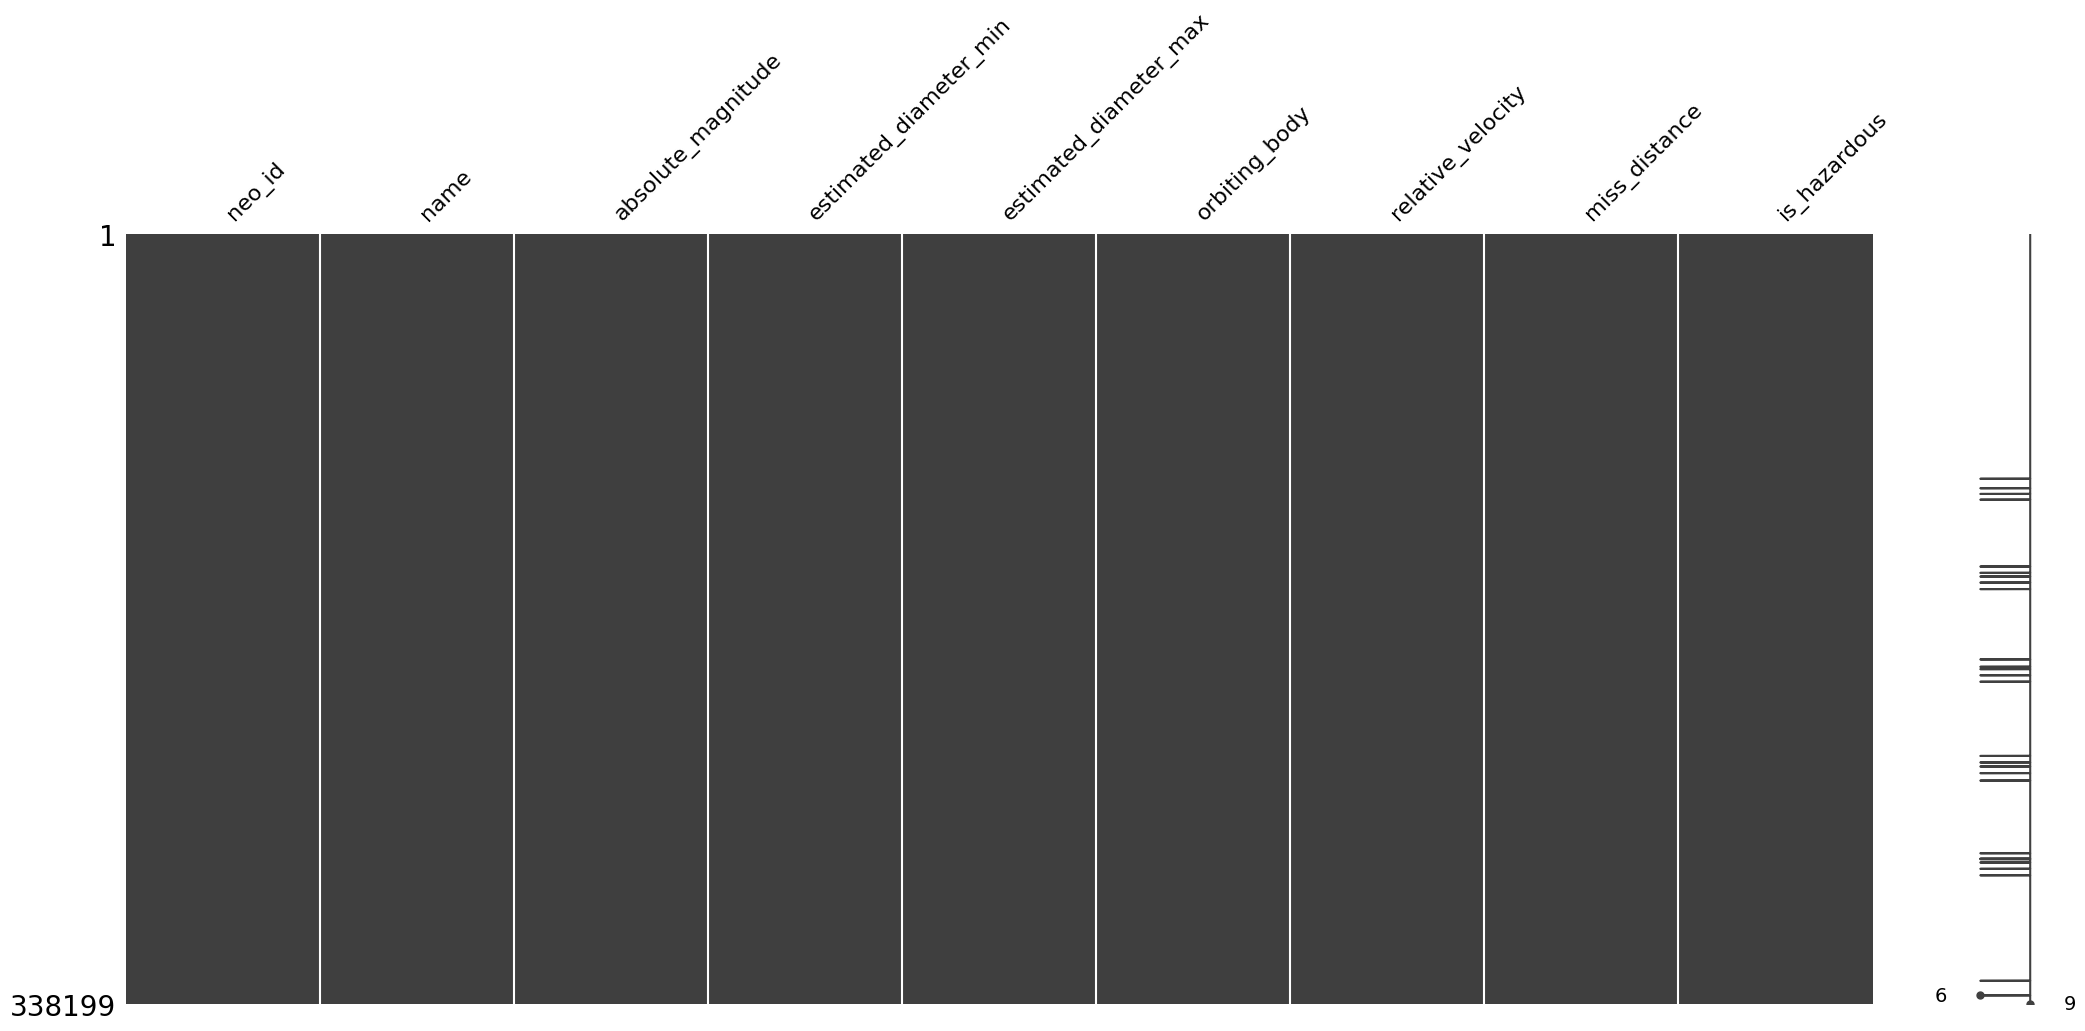

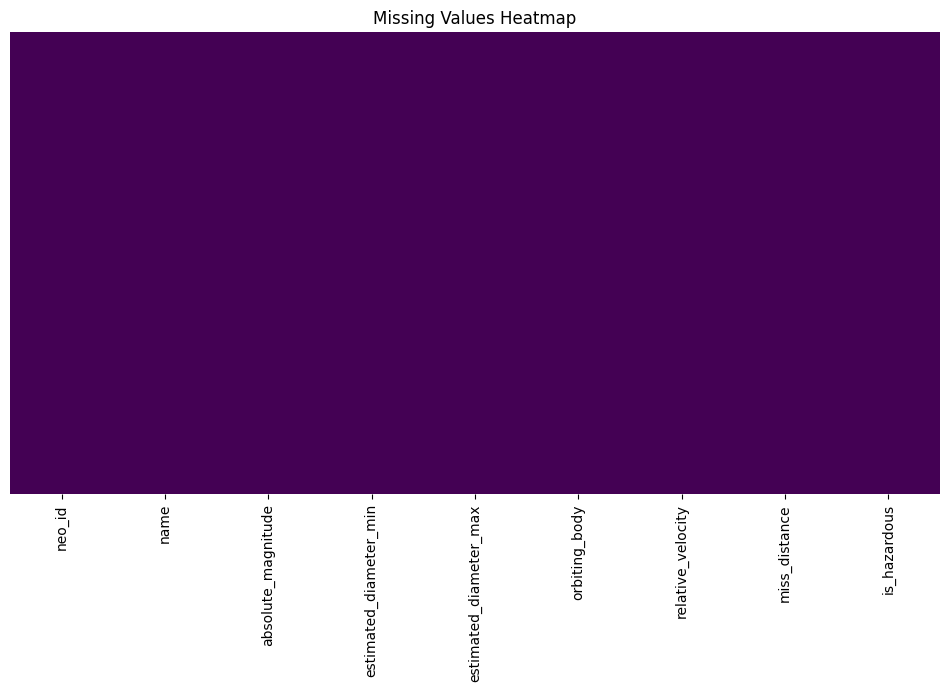

In [52]:
import missingno as msno
msno.matrix(NEO_data)

import seaborn as sns
import matplotlib.pyplot as plt

missing_data = NEO_data.isna()

plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Why heatmaps and missing value matrix plots don’t work well on large datasets:
Libraries like Seaborn's heatmap or Missingno's matrix() or heatmap() try to plot row-wise visualizations. For 300,000+ rows:

Too many pixels to render clearly.

Most missing patterns get compressed into a line, so you see a "flat" or "empty" graph.

Some libraries truncate or sample rows silently or clip colors, so missing blocks get lost visually.


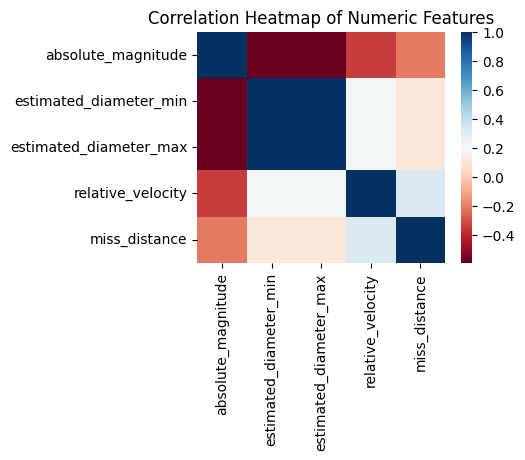

In [53]:
#to visualize Correlation of each feature
NEO_numeric_data = NEO_data.select_dtypes(include='number').drop(columns=['neo_id'])
plt.figure(figsize=(4, 3))


sns.heatmap(NEO_numeric_data.corr(), cmap='RdBu')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

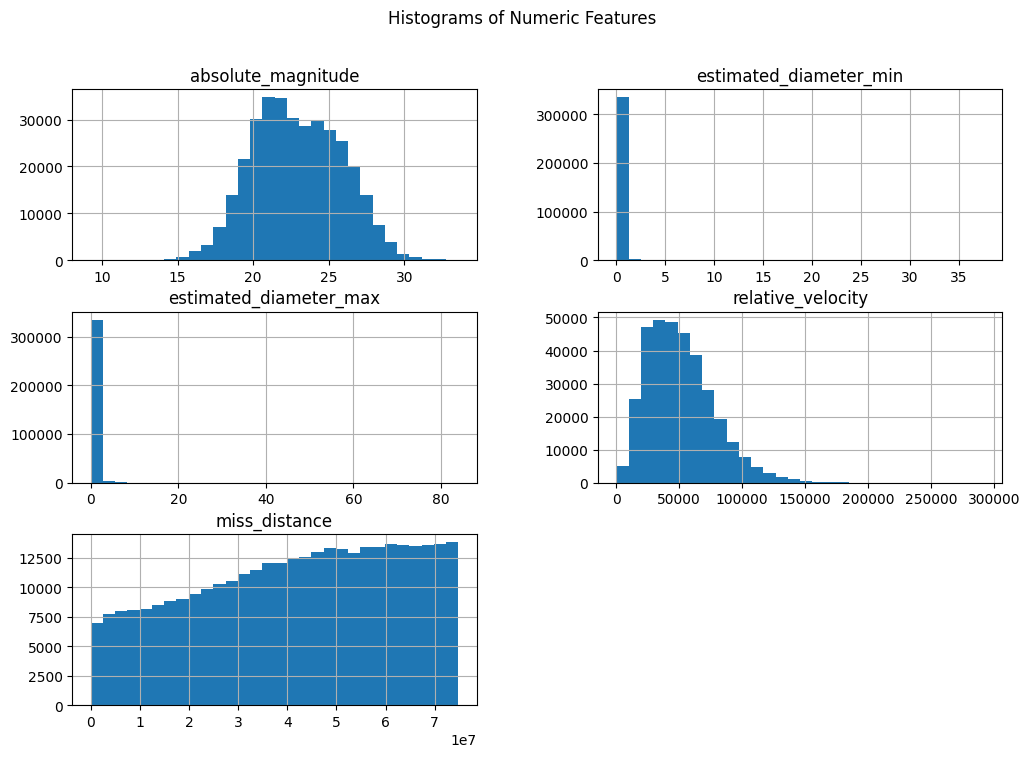

In [54]:
numeric_data = NEO_data.drop(columns=['neo_id']).select_dtypes(include='number')
numeric_data.hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [55]:
#Checking and handling missing values
NEO_data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

the missing values in absolute_magnitude,estimated_diameter_min,estimated_diameter_max can be handled by calculating the mean or median of the respective feature since these features are numeric.

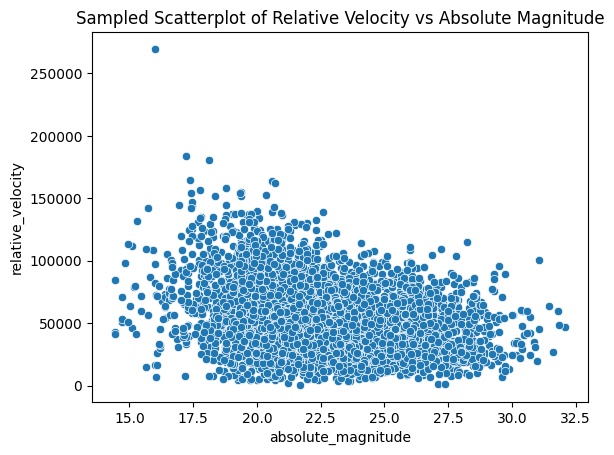

In [56]:
sample_data = NEO_data.sample(n=5000, random_state=42)
sns.scatterplot(x='absolute_magnitude', y='relative_velocity', data=sample_data)
plt.title("Sampled Scatterplot of Relative Velocity vs Absolute Magnitude")
plt.show()

The above is a scatterplot between relative_velocity and absolute_magnitude (extracted portion of data from dataset).  
This shows that there is a downward trend; a decline in relative velocity as the absolute magnitude(brightness level) of an object increases.  

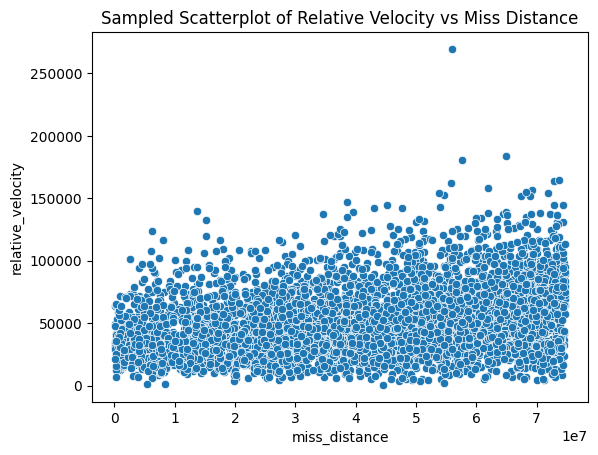

In [57]:
sample_data = NEO_data.sample(n=5000, random_state=42)
sns.scatterplot(x='miss_distance', y='relative_velocity', data=sample_data)
plt.title("Sampled Scatterplot of Relative Velocity vs Miss Distance")
plt.show()

The above is a scatterplot between relative_velocity and miss_distance (extracted portion of data from dataset).  
There is a very subtle/minor upward trend, the objects having relatively higher velocity may have a slightly larger miss distance


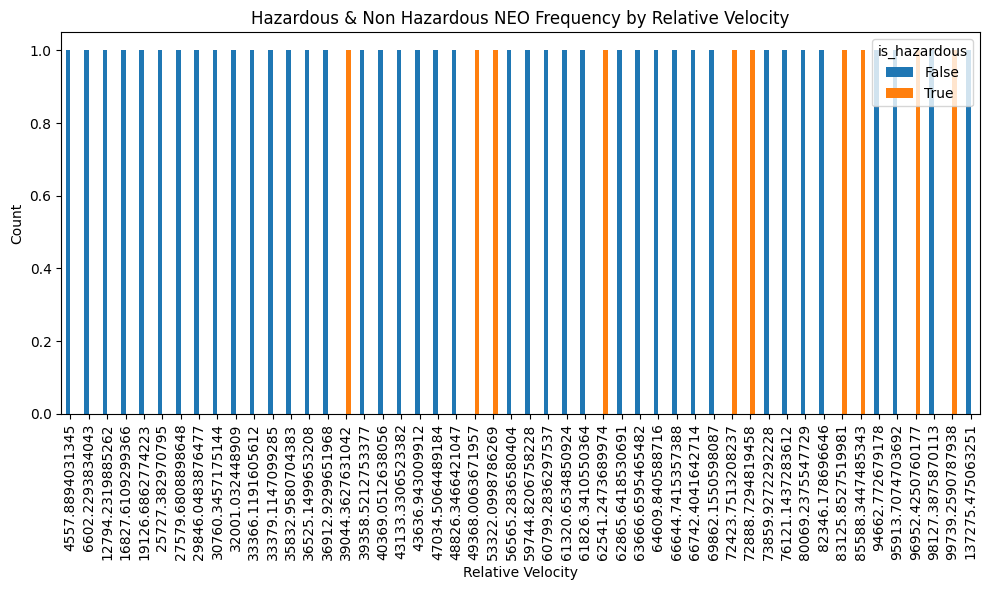

In [58]:
sample_data = NEO_data.sample(n=50, random_state=42)
pd.crosstab(sample_data.relative_velocity, sample_data.is_hazardous).plot(kind="bar", figsize=(10,6))
plt.title('Hazardous & Non Hazardous NEO Frequency by Relative Velocity')
plt.xlabel('Relative Velocity')
plt.xticks(rotation=90)

plt.ylabel('Count')
plt.tight_layout()
plt.show()

The above chart shows the distribution of hazardous & non hazardous NEO's based on their relative velocity.

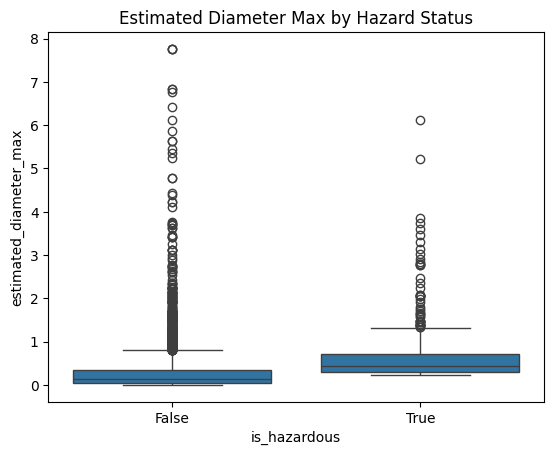

In [59]:
sample_data = NEO_data.sample(n=5000, random_state=42)
sns.boxplot(x='is_hazardous', y='estimated_diameter_max', data=sample_data)
plt.title("Estimated Diameter Max by Hazard Status")
plt.show()

The true box is positioned higher on the y axis in comparison to the False box. This indicates that on a general perspective hazardous NEO's are larger in size in comparison to Non hazardous NEO'S.  
However, the outliers (circles) of the false box suggest that size of non hazardous NEO's varies.
So while hazardous NEO'S are larger in general, there are cases where the non hazardous NEO maybe larger.

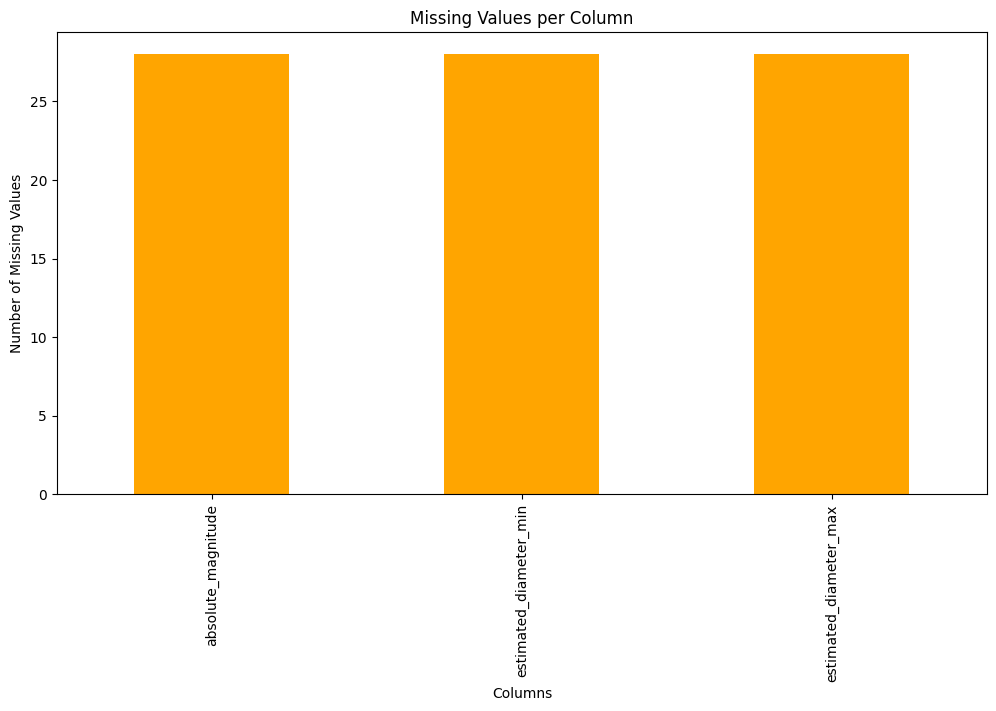

In [60]:
missing_counts = NEO_data.isna().sum()
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

Using a bar plot does confirm that we do really have missing values which we have to handle

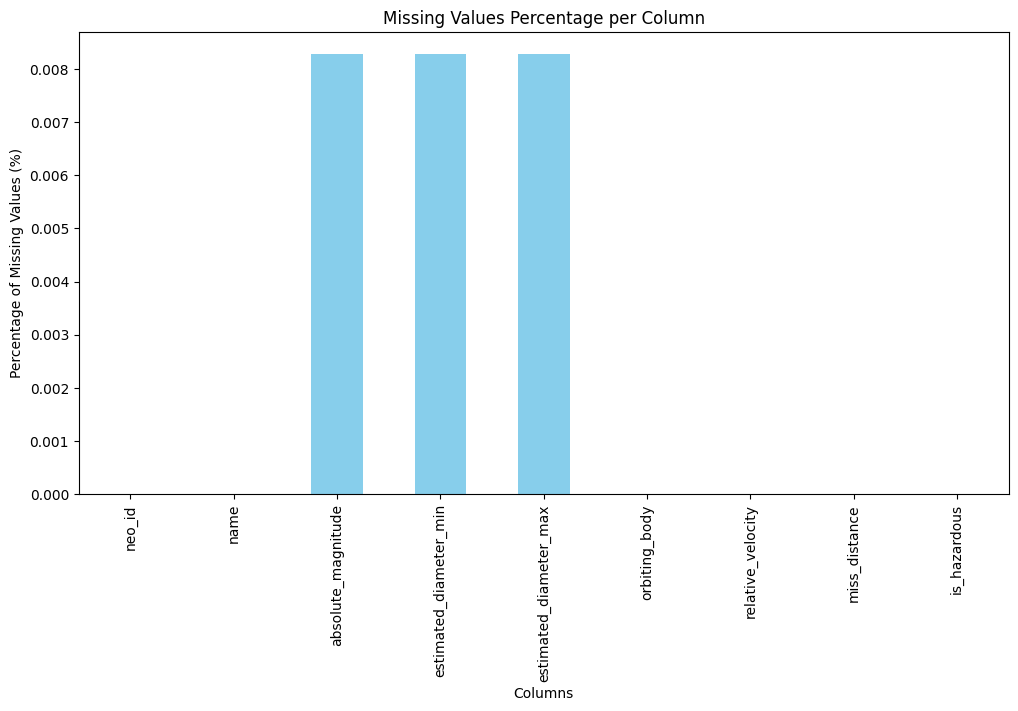

In [61]:
# Plot percentage of missing values per column
missing_percentage = NEO_data.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()

This plot tells us that we have near to 8.5% of missing values rest we have 91.5% of synthetic data.

In [62]:
NEO_data['absolute_magnitude'] = NEO_data['absolute_magnitude'].fillna(NEO_data['absolute_magnitude'].median())
NEO_data['estimated_diameter_min'] = NEO_data['estimated_diameter_min'].fillna(NEO_data['estimated_diameter_min'].median())
NEO_data['estimated_diameter_max'] = NEO_data['estimated_diameter_max'].fillna(NEO_data['estimated_diameter_max'].median())
NEO_data.isna().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

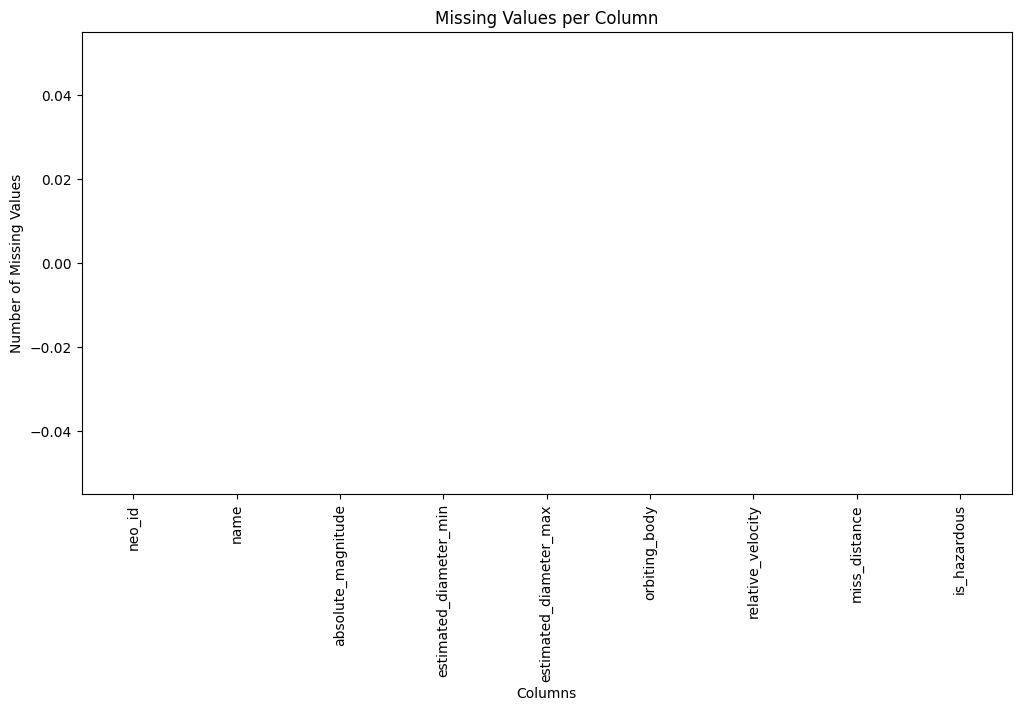

In [63]:

missing_counts = NEO_data.isna().sum()
plt.figure(figsize=(12, 6))
missing_counts[missing_counts >= 0].plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

This plot shows that we have successfully terminated and handled all of the missing data.

In [64]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['is_hazardous']:
    le = LabelEncoder()
    NEO_data[col] = le.fit_transform(NEO_data[col].astype(str))
    label_encoders[col] = le
NEO_data.head()


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0


We have successfully encoded the **"is_hazardous"** column so that we can further preprocess it.

In [65]:
NEO_data['name'].value_counts().head(25000)
NEO_data.drop('name',axis=1,inplace=True)

NEO_data['neo_id'].value_counts().head(25000)
NEO_data.drop('neo_id',axis=1,inplace=True)

NEO_data['orbiting_body'].value_counts().head(25000)
NEO_data.drop('orbiting_body',axis=1,inplace=True)

NEO_data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


The columns removed are just an identifier — like a label or ID. It doesn't contain useful numerical or categorical information that relates to the object's physical properties or its threat level.

Including it would:

Add noise (it's just a string of characters).

Confuse the model (it might try to find patterns in arbitrary strings).

Risk overfitting if names are unique or semi-unique.

# Checking for Outliers

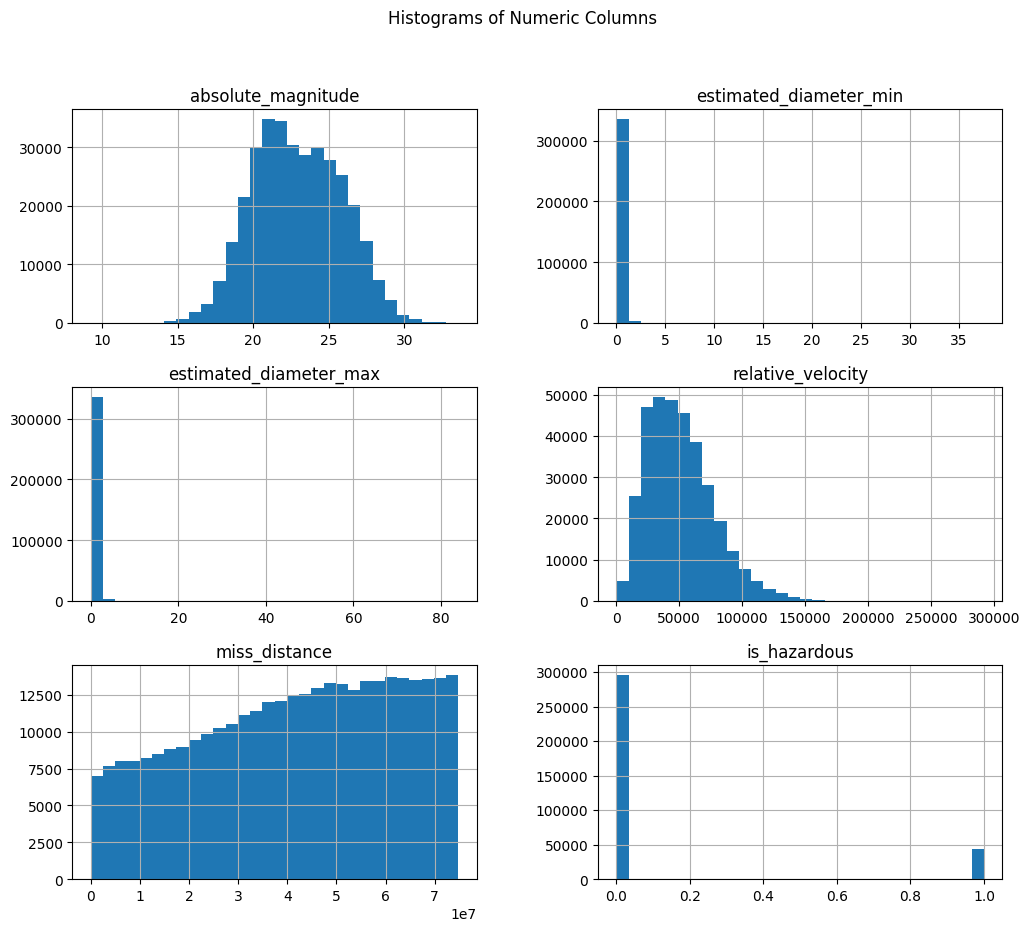

In [67]:
import matplotlib.pyplot as plt
import numpy as np

NEO_data.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

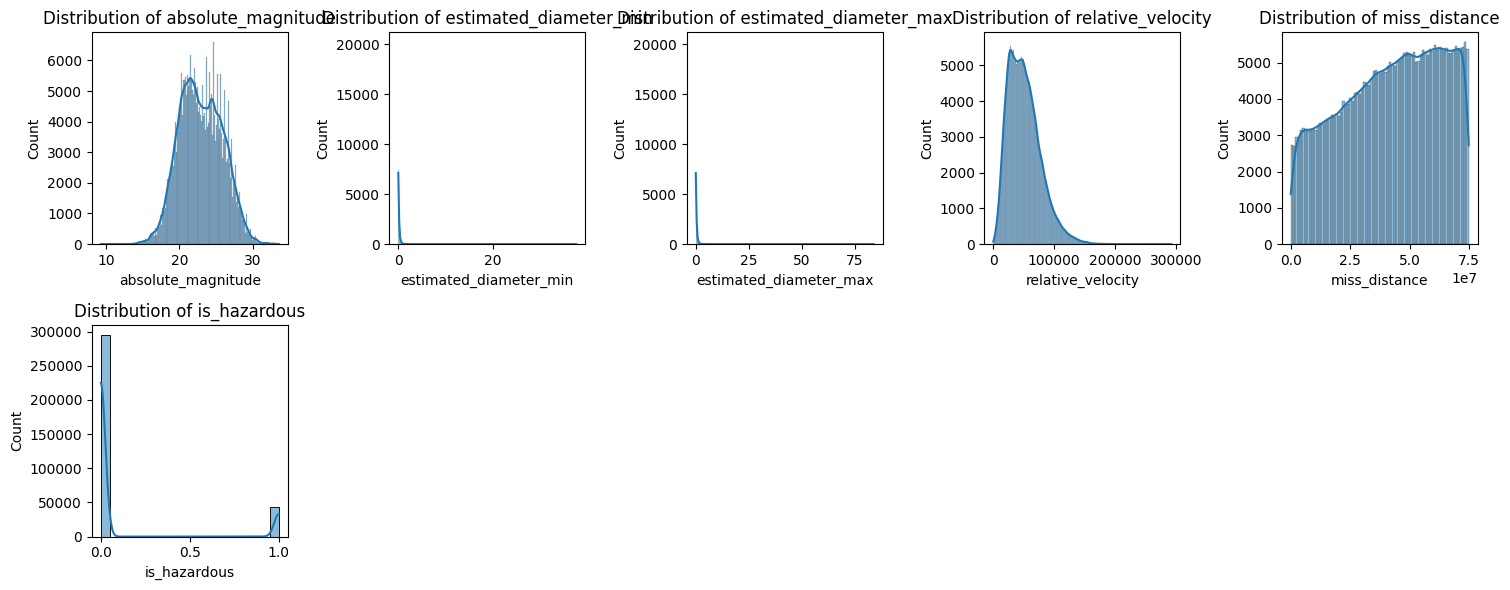

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of numeric columns
num_cols = len(NEO_data.select_dtypes(include=[np.number]).columns)

# Calculate rows and columns for the grid
ncols = 5  # you can change this
nrows = int(np.ceil(num_cols / ncols))  # Ceiling to get enough rows

# Create subplots dynamically based on the number of columns
plt.figure(figsize=(ncols * 3, nrows * 3))

# Loop through the numeric columns and create a subplot for each
for i, col in enumerate(NEO_data.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust to grid
    sns.histplot(NEO_data[col], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Z-SCORE

In [75]:
from scipy.stats import zscore


z_scores = zscore(NEO_data.select_dtypes(include=[np.number]))


outliers = np.abs(z_scores) > 3


outliers_count = np.sum(outliers, axis=0)


outliers_count_df = pd.DataFrame(outliers_count, index=NEO_data.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_df)


                        Outliers Count
absolute_magnitude                 388
estimated_diameter_min            4230
estimated_diameter_max            4230
relative_velocity                 3079
miss_distance                        0
is_hazardous                         0


We won't be needing Z Score as our data is not normalized or doesnt have normal distribution.

In [76]:
import pandas as pd
Q1 = NEO_data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = NEO_data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((NEO_data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                (NEO_data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))
print("Lower Bound\n",Q1 - 1.5 * IQR)
print("Upper Bound\n",Q3 + 1.5 * IQR)

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_df = pd.DataFrame(outliers_count_iqr, index=NEO_data.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_df)


Lower Bound
 absolute_magnitude        1.420000e+01
estimated_diameter_min   -2.201016e-01
estimated_diameter_max   -4.921621e-01
relative_velocity        -2.323065e+04
miss_distance            -2.664591e+07
is_hazardous              0.000000e+00
dtype: float64
Upper Bound
 absolute_magnitude        3.164000e+01
estimated_diameter_min    4.345258e-01
estimated_diameter_max    9.716293e-01
relative_velocity         1.206165e+05
miss_distance             1.109309e+08
is_hazardous              0.000000e+00
dtype: float64
                        Outliers Count
absolute_magnitude                 389
estimated_diameter_min           26166
estimated_diameter_max           26166
relative_velocity                 5449
miss_distance                        0
is_hazardous                     43162


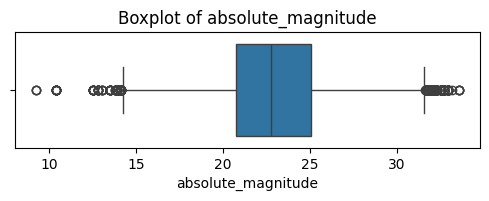

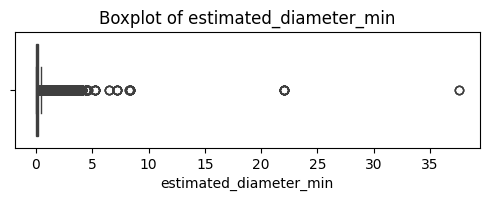

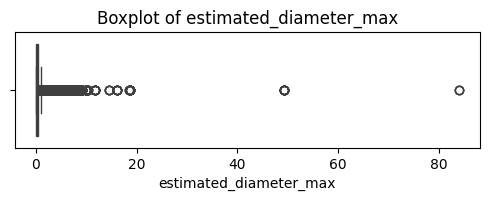

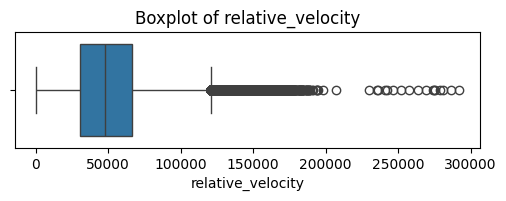

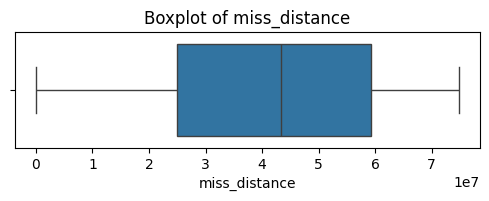

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_check = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']  # Skip is_hazardous

for col in cols_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=NEO_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()




neo_id and miss_distance have very large value ranges compared to the rest.

All other columns (like absolute_magnitude, estimated_diameter_min/max, relative_velocity, etc.) are compressed near 0, making their box plots barely visible.

is_hazardous is a binary column (0 or 1) and doesn't need outlier detection.

**Due to the vast difference in scale, smaller-valued columns are getting squashed and visually lost. This is a scaling issue, not a data issue.**

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

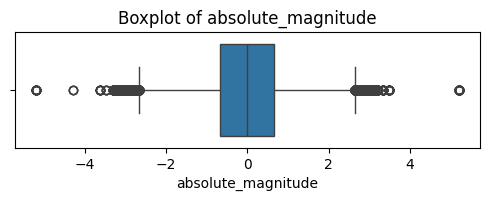

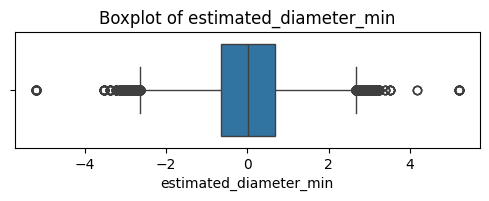

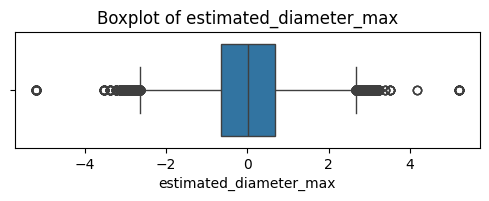

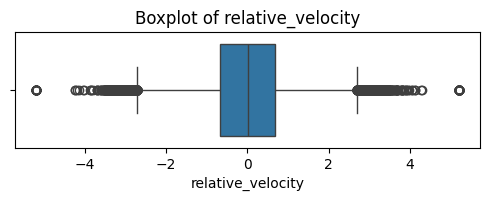

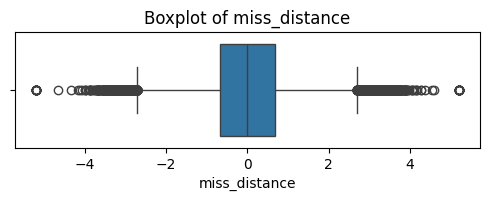

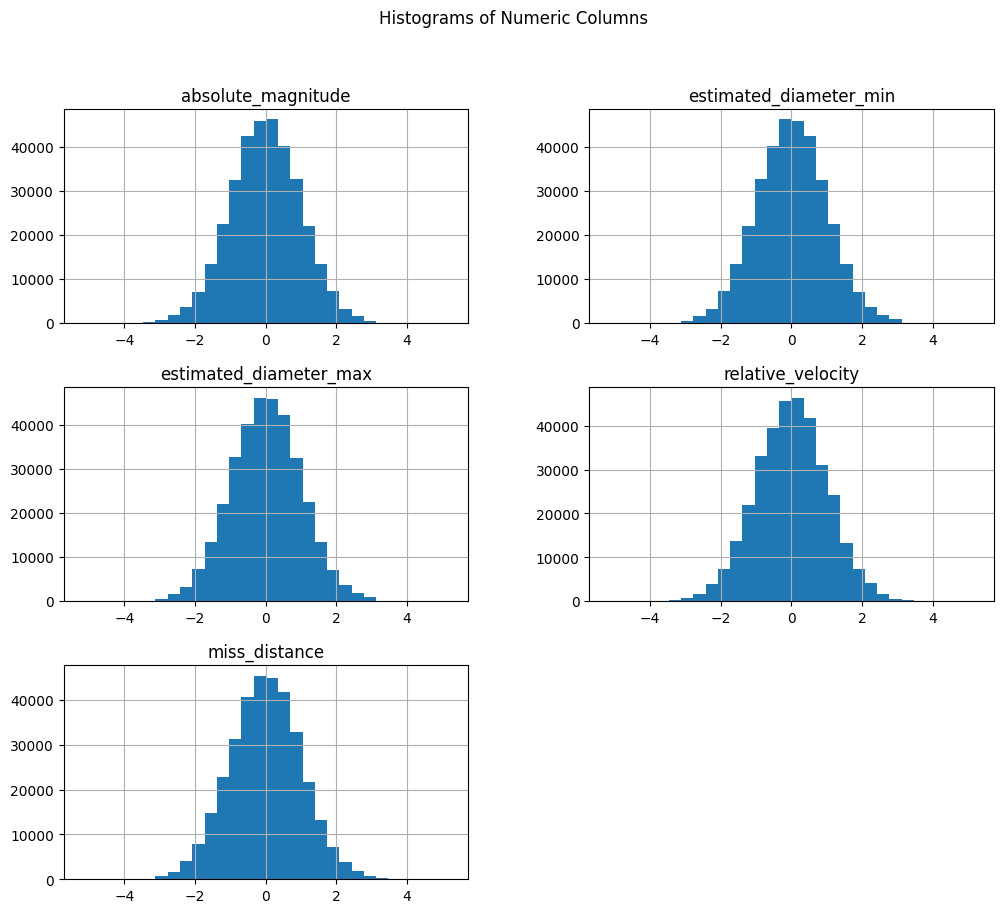

                        Outliers Count
absolute_magnitude                 739
estimated_diameter_min             735
estimated_diameter_max             735
relative_velocity                  841
miss_distance                      954


In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer,Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Automatically identify numeric feature columns (excluding target)
numeric_features = NEO_data.select_dtypes(include=[np.number]).drop(columns=['is_hazardous']).columns.tolist()

# Scalers to apply
scalers = {

    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

# Dictionary to hold scaled DataFrames
scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(NEO_data[numeric_features])
    scaled_data[name] = pd.DataFrame(scaled, columns=numeric_features)

cols= ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']
scaled_data_transformer=pd.DataFrame(scaled,columns=cols)
scaled_data_transformer.head()
# (Optional) View one of the scaled datasets

#print(scaled_data["QuantileTransformer"].head())
#print(scaled_data)

cols_to_check = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']  # Skip is_hazardous

for col in cols_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=scaled_data_transformer[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

scaled_data_transformer.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

from scipy.stats import zscore


z_scores = zscore(scaled_data_transformer.select_dtypes(include=[np.number]))


outliers = np.abs(z_scores) > 3


outliers_count = np.sum(outliers, axis=0)


outliers_count_df = pd.DataFrame(outliers_count, index=scaled_data_transformer.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_df)



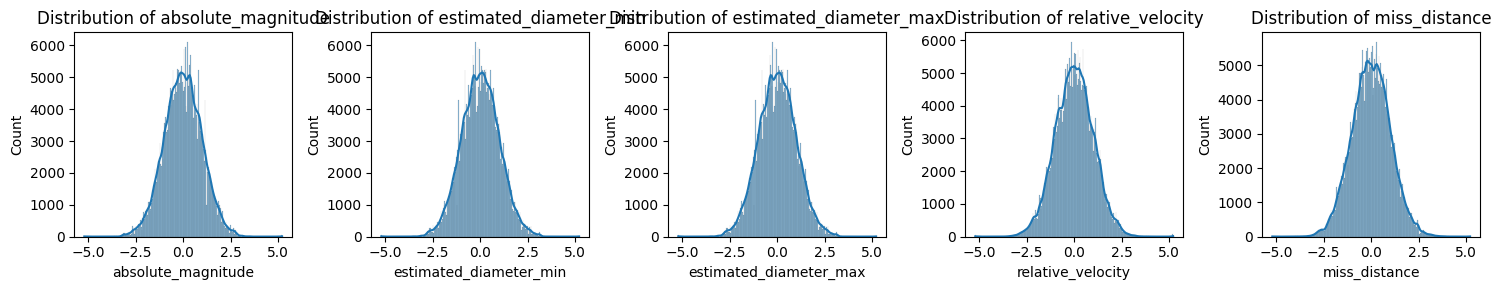

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of numeric columns
num_cols = len(scaled_data_transformer.select_dtypes(include=[np.number]).columns)

# Calculate rows and columns for the grid
ncols = 5  # you can change this
nrows = int(np.ceil(num_cols / ncols))  # Ceiling to get enough rows

# Create subplots dynamically based on the number of columns
plt.figure(figsize=(ncols * 3, nrows * 3))

# Loop through the numeric columns and create a subplot for each
for i, col in enumerate(scaled_data_transformer.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust to grid
    sns.histplot(scaled_data_transformer[col], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In our dataset, the numerical features are **not Gaussian-distributed** and contain significant outliers, as observed from the box plots and distribution analysis. To ensure effective preprocessing before feeding the data into a supervised machine learning model, it was crucial to choose scalers that are robust to outliers and can handle non-normal distributions.

1. **RobustScaler**:
We used RobustScaler because it scales features using the Interquartile Range (IQR) instead of the mean and standard deviation. This makes it resistant to outliers, preventing them from heavily influencing the scale of the features. It is particularly suitable when the dataset includes extreme values that could distort the behavior of other scalers like StandardScaler or MinMaxScaler.

2. **QuantileTransformer**
We also used the QuantileTransformer with output_distribution='normal' to transform the features into a Gaussian-like distribution. This is beneficial for many machine learning algorithms (e.g., logistic regression, SVMs), which perform better when the input data follows a normal distribution. Additionally, the transformation is non-linear and reduces the effect of outliers by spreading out the most frequent values.

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_components = pca.fit_transform(NEO_data.iloc[:, :-1])
pca_df = pd.DataFrame(pca_components, columns=[f"PCA_{i}" for i in range(1, 6)])
pca_df.head()
# Access PCA component weights
loadings = pd.DataFrame(
    pca.components_,
    columns=NEO_data.columns[:-1],  # Exclude 'target'
    index=[f"PCA_{i}" for i in range(1, 6)]
)

# Show which features contribute most to each component
loadings.T.sort_values(by="PCA_1", ascending=False).head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
miss_distance,9.999999e-01,-0.000410,1.601413e-08,9.792148e-10,-7.932544e-12
relative_velocity,4.099388e-04,1.000000,3.458718e-05,-4.363937e-07,6.652790e-09
estimated_diameter_max,3.766041e-09,0.000006,-1.485779e-01,8.968485e-01,-4.166382e-01
estimated_diameter_min,1.684224e-09,0.000002,-6.652789e-02,4.112949e-01,9.090712e-01
absolute_magnitude,-2.992028e-08,-0.000034,9.866604e-01,1.627859e-01,-1.443886e-03


Due to my Domain Knowledge and PCAS suggestion we got these 6 columns as important **'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance'**

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(NEO_data.iloc[:, :-1], NEO_data['is_hazardous'])

selected_features = selector.get_support(indices=True)
selected_df = NEO_data.iloc[:, selected_features]
selected_df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07


Again selectk best and class_if showed us that the same columns are important.

In [84]:
from sklearn.utils import resample
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['is_hazardous']:
    le = LabelEncoder()
    NEO_data[col] = le.fit_transform(NEO_data[col].astype(str))
    label_encoders[col] = le


cols = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']
# Separate features and target

X = NEO_data.drop(columns=cols)
y = NEO_data["is_hazardous"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate the minority and majority classes
X_majority = X_train[y_train == 0]  # Assuming 0 is the majority class
X_minority = X_train[y_train == 1]  # Assuming 1 is the minority class

y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# Step 2: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Now you can train your model using X_train_balanced and y_train_balanced


# Print class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({0: 206526, 1: 30213})
After SMOTE: Counter({0: 206526, 1: 206526})


Over here we cured the issue of UNDERSAMPLING by using SMOTE.
we also changed data into trained and test sets.

# Feature Engineering

In [16]:
import pandas as pd
import numpy as np

Saved_NEO_data = NEO_data

NEO_data = pd.read_csv('Data/Nasa_Dataset.csv')

# Drop unnecessary identifier columns
NEO_data.drop(columns=["name", "neo_reference_id", "orbiting_body"], inplace=True, errors='ignore')

# Add engineered features
NEO_data['estimated_diameter_avg'] = (NEO_data['estimated_diameter_min'] + NEO_data['estimated_diameter_max']) / 2
NEO_data['diameter_range'] = NEO_data['estimated_diameter_max'] - NEO_data['estimated_diameter_min']
NEO_data['velocity_distance_ratio'] = NEO_data['relative_velocity'] / NEO_data['miss_distance']


# Drop original diameter columns
NEO_data.drop(columns=["estimated_diameter_min", "estimated_diameter_max"], inplace=True)



# Preprocessing again on the new data

In [17]:
NEO_data.head()
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['is_hazardous']:
    le = LabelEncoder()
    NEO_data[col] = le.fit_transform(NEO_data[col].astype(str))
    label_encoders[col] = le
NEO_data.head()

,neo_id,absolute_magnitude,relative_velocity,miss_distance,is_hazardous,estimated_diameter_avg,diameter_range,velocity_distance_ratio
0,2162117,19.14,71745.401048,5.814362e+07,0,0.639061,0.488200,0.001234
1,2349507,18.50,109949.757148,5.580105e+07,1,0.858109,0.655537,0.001970
2,2455415,21.45,24865.506798,6.720689e+07,0,0.220568,0.168499,0.000370
3,3132126,20.63,78890.076805,3.039644e+07,0,0.321768,0.245809,0.002595
4,3557844,22.70,56036.519484,6.311863e+07,0,0.124035,0.094754,0.000888


In [18]:
NEO_data.drop('neo_id',axis=1,inplace=True)

In [19]:
NEO_data['log_miss_distance'] = np.log1p(NEO_data['miss_distance'])
NEO_data['log_relative_velocity'] = np.log1p(NEO_data['relative_velocity'])

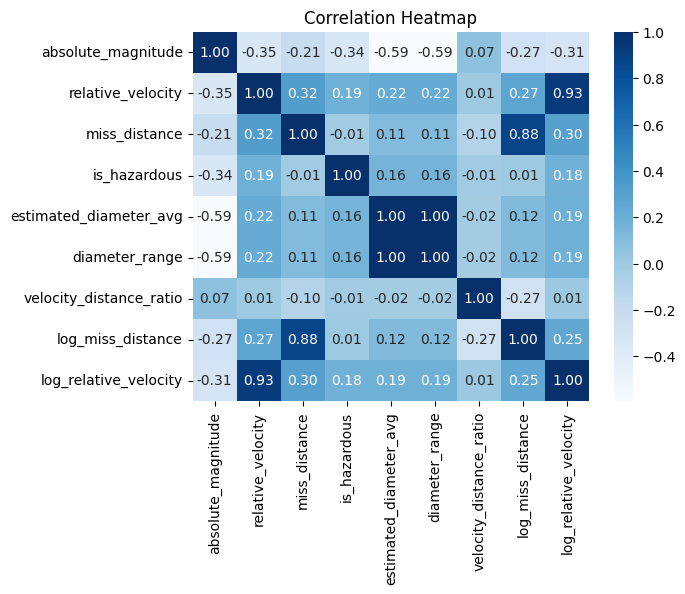

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(NEO_data.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
NEO_data.isna().sum()

absolute_magnitude         28
relative_velocity           0
miss_distance               0
is_hazardous                0
estimated_diameter_avg     28
diameter_range             28
velocity_distance_ratio     0
log_miss_distance           0
log_relative_velocity       0
dtype: int64

In [22]:
NEO_data['absolute_magnitude'] = NEO_data['absolute_magnitude'].fillna(NEO_data['absolute_magnitude'].median())
NEO_data['estimated_diameter_avg'] = NEO_data['estimated_diameter_avg'].fillna(NEO_data['estimated_diameter_avg'].median())
NEO_data['diameter_range'] = NEO_data['diameter_range'].fillna(NEO_data['diameter_range'].median())
NEO_data.isna().sum()

absolute_magnitude         0
relative_velocity          0
miss_distance              0
is_hazardous               0
estimated_diameter_avg     0
diameter_range             0
velocity_distance_ratio    0
log_miss_distance          0
log_relative_velocity      0
dtype: int64

In [23]:
target = NEO_data['is_hazardous']
NEO_data=NEO_data.drop('is_hazardous',axis=1)
NEO_data['is_hazardous'] = target


In [24]:
NEO_data=NEO_data.drop('relative_velocity',axis=1)

# Applying PCA and Classif

In [25]:
NEO_data.head()

,absolute_magnitude,miss_distance,estimated_diameter_avg,diameter_range,velocity_distance_ratio,log_miss_distance,log_relative_velocity,is_hazardous
0,19.14,5.814362e+07,0.639061,0.488200,0.001234,17.878427,11.180893,0
1,18.50,5.580105e+07,0.858109,0.655537,0.001970,17.837303,11.607788,1
2,21.45,6.720689e+07,0.220568,0.168499,0.000370,18.023286,10.121277,0
3,20.63,3.039644e+07,0.321768,0.245809,0.002595,17.229836,11.275823,0
4,22.70,6.311863e+07,0.124035,0.094754,0.000888,17.960526,10.933777,0


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca_components = pca.fit_transform(NEO_data.iloc[:, :-1])
pca_df = pd.DataFrame(pca_components, columns=[f"PCA_{i}" for i in range(1, 7)])
pca_df.head()
# Access PCA component weights
loadings = pd.DataFrame(
    pca.components_,
    columns=NEO_data.columns[:-1],  # Exclude 'target'
    index=[f"PCA_{i}" for i in range(1, 7)]
)

# Show which features contribute most to each component
loadings.T.sort_values(by="PCA_1", ascending=False).head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
miss_distance,1.000000e+00,3.140435e-08,-1.800714e-09,6.168901e-09,-3.601522e-08,-1.308375e-09
log_miss_distance,3.675075e-08,-2.476618e-02,-1.318464e-01,-1.335316e-01,9.810069e-01,4.240102e-02
log_relative_velocity,8.287893e-09,-5.245752e-02,9.854106e-01,-1.130576e-01,1.158568e-01,-3.051917e-03
estimated_diameter_avg,2.725131e-09,-1.063188e-01,7.018469e-02,7.762774e-01,1.124254e-01,-2.842946e-04
diameter_range,2.081814e-09,-8.122035e-02,5.361633e-02,5.930232e-01,8.588535e-02,-2.171818e-04


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_new = selector.fit_transform(NEO_data.iloc[:, :-1], NEO_data['is_hazardous'])

selected_features = selector.get_support(indices=True)
selected_df = NEO_data.iloc[:, selected_features]
selected_df.head()

,absolute_magnitude,estimated_diameter_avg,diameter_range,velocity_distance_ratio,log_miss_distance,log_relative_velocity
0,19.14,0.639061,0.488200,0.001234,17.878427,11.180893
1,18.50,0.858109,0.655537,0.001970,17.837303,11.607788
2,21.45,0.220568,0.168499,0.000370,18.023286,10.121277
3,20.63,0.321768,0.245809,0.002595,17.229836,11.275823
4,22.70,0.124035,0.094754,0.000888,17.960526,10.933777


Choosing the **classif** features because we want our features to give accurate results later on when we apply the model, which may help us improve the performance and help us reduce **Overfitting** or **dimensionality reduction**

# Preprocessing Contd.

In [28]:
selected_df.head()
selected_df['is_hazardous'] = NEO_data['is_hazardous']
selected_df.head()

,absolute_magnitude,estimated_diameter_avg,diameter_range,velocity_distance_ratio,log_miss_distance,log_relative_velocity,is_hazardous
0,19.14,0.639061,0.488200,0.001234,17.878427,11.180893,0
1,18.50,0.858109,0.655537,0.001970,17.837303,11.607788,1
2,21.45,0.220568,0.168499,0.000370,18.023286,10.121277,0
3,20.63,0.321768,0.245809,0.002595,17.229836,11.275823,0
4,22.70,0.124035,0.094754,0.000888,17.960526,10.933777,0


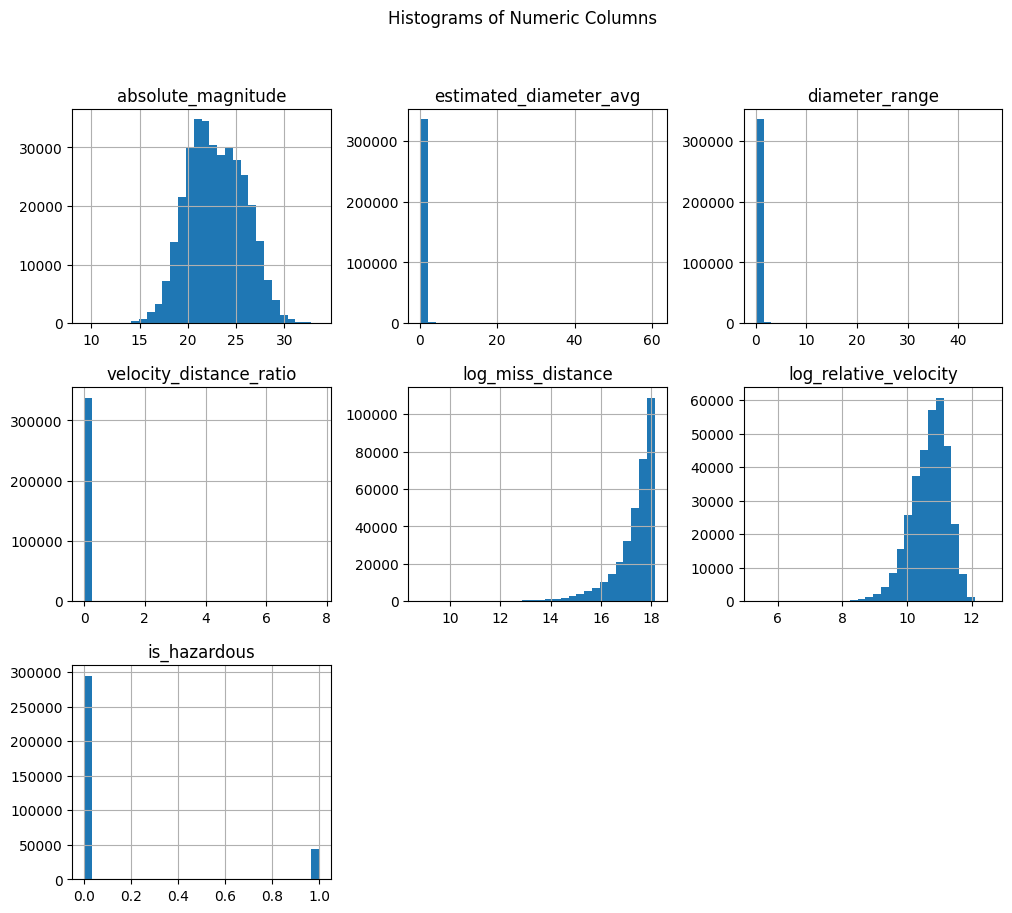

In [29]:
import matplotlib.pyplot as plt
import numpy as np

selected_df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of numeric columns
num_cols = len(selected_df.select_dtypes(include=[np.number]).columns)

# Calculate rows and columns for the grid
ncols = 5  # you can change this
nrows = int(np.ceil(num_cols / ncols))  # Ceiling to get enough rows

# Create subplots dynamically based on the number of columns
plt.figure(figsize=(ncols * 3, nrows * 3))

# Loop through the numeric columns and create a subplot for each
for i, col in enumerate(selected_df.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust to grid
    sns.histplot(selected_df[col], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import zscore

z_scores = zscore(selected_df.select_dtypes(include=[np.number]))

outliers = np.abs(z_scores) > 3

outliers_count = np.sum(outliers, axis=0)

outliers_count_df = pd.DataFrame(outliers_count, index=selected_df.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_df)



                         Outliers Count
absolute_magnitude                  388
estimated_diameter_avg             4230
diameter_range                     4230
velocity_distance_ratio             776
log_miss_distance                  6770
log_relative_velocity              2637
is_hazardous                          0


In [16]:
import pandas as pd
Q1 = selected_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = selected_df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((selected_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                (selected_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))
print("Lower Bound\n",Q1 - 1.5 * IQR)
print("Upper Bound\n",Q3 + 1.5 * IQR)

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_df = pd.DataFrame(outliers_count_iqr, index=selected_df.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_df)


Lower Bound
 absolute_magnitude         14.200000
estimated_diameter_avg     -0.356132
diameter_range             -0.272061
velocity_distance_ratio    -0.000829
log_miss_distance          15.732319
log_relative_velocity       9.169732
is_hazardous                0.000000
dtype: float64
Upper Bound
 absolute_magnitude         31.640000
estimated_diameter_avg      0.703078
diameter_range              0.537103
velocity_distance_ratio     0.003583
log_miss_distance          19.198669
log_relative_velocity      12.270293
is_hazardous                0.000000
dtype: float64
                         Outliers Count
absolute_magnitude                  389
estimated_diameter_avg            26166
diameter_range                    26166
velocity_distance_ratio           35733
log_miss_distance                 20573
log_relative_velocity              4540
is_hazardous                      43162


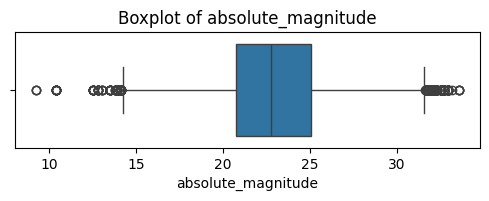

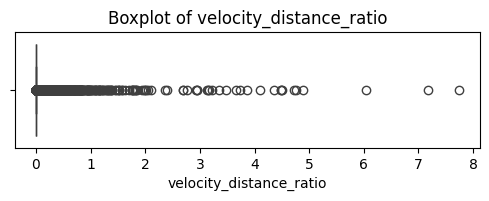

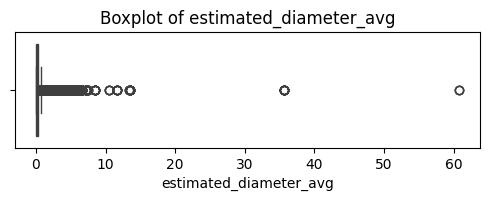

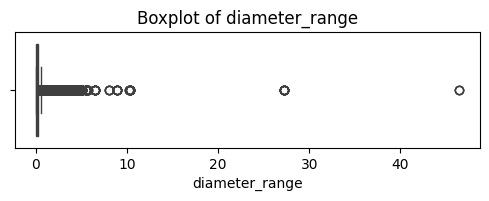

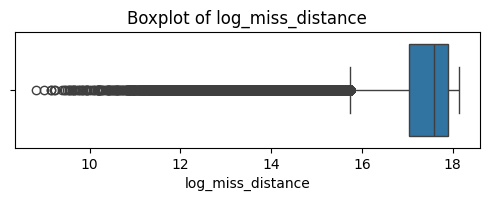

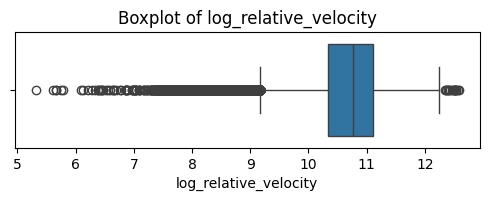

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_check = ['absolute_magnitude', 'velocity_distance_ratio', 'estimated_diameter_avg',
                 'diameter_range', 'log_miss_distance','log_relative_velocity']  # Skip is_hazardous

for col in cols_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=selected_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()





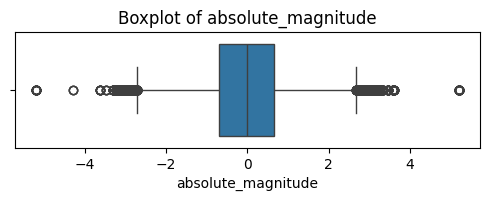

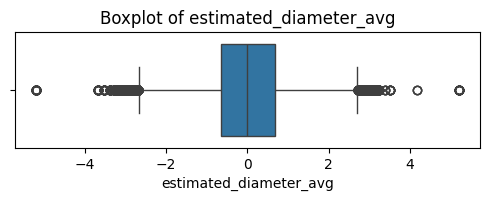

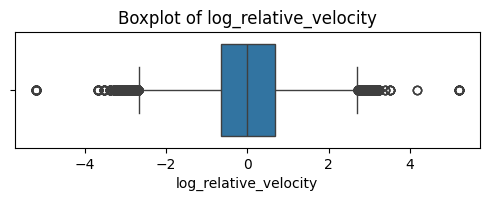

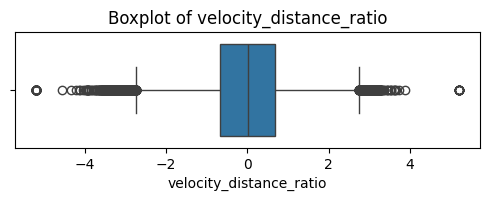

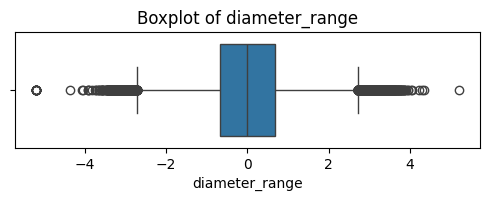

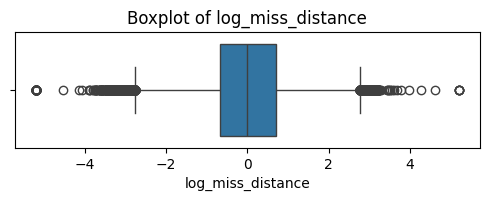

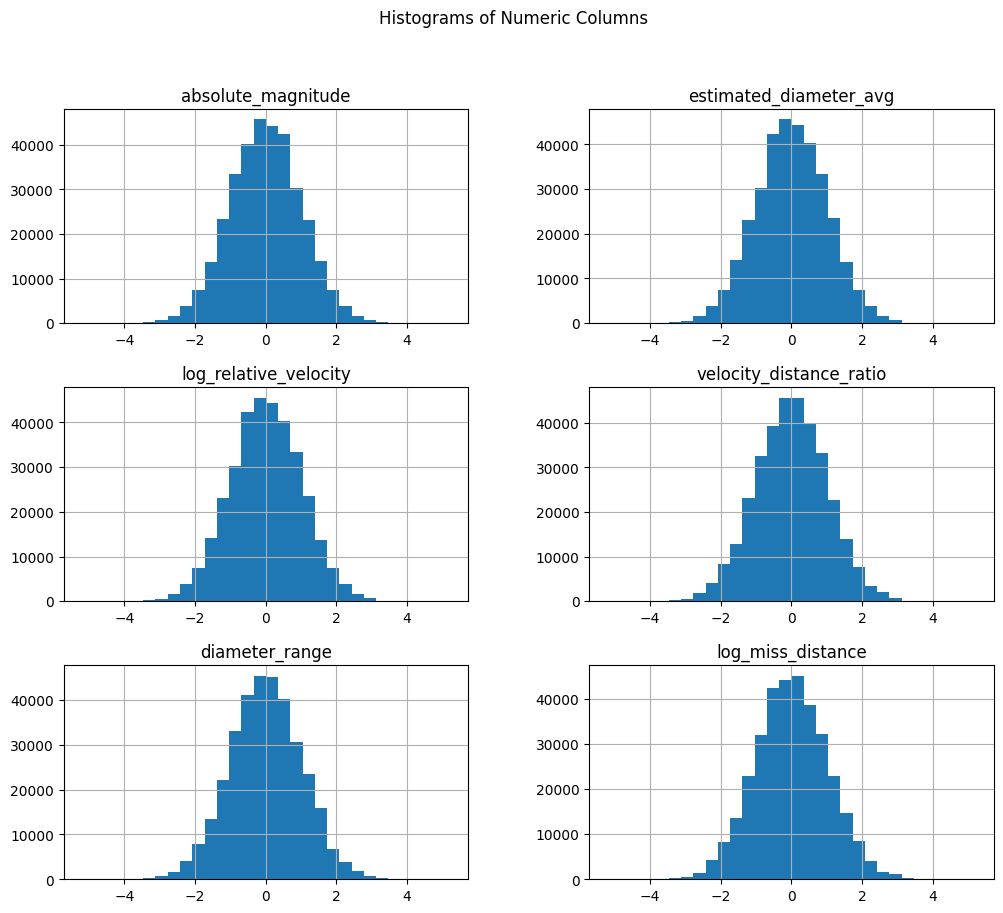

                         Outliers Count
absolute_magnitude                  738
estimated_diameter_avg              768
log_relative_velocity               768
velocity_distance_ratio             873
diameter_range                      812
log_miss_distance                   969


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer,Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Automatically identify numeric feature columns (excluding target)
numeric_features = selected_df.select_dtypes(include=[np.number]).drop(columns=['is_hazardous']).columns.tolist()

# Scalers to apply
scalers = {

    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

# Dictionary to hold scaled DataFrames
scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(selected_df[numeric_features])
    scaled_data[name] = pd.DataFrame(scaled, columns=numeric_features)

cols= ['absolute_magnitude', 'estimated_diameter_avg', 'log_relative_velocity',
                 'velocity_distance_ratio', 'diameter_range', 'log_miss_distance']
scaled_data_transformer=pd.DataFrame(scaled,columns=cols)
scaled_data_transformer.head()
# (Optional) View one of the scaled datasets

#print(scaled_data["QuantileTransformer"].head())
#print(scaled_data)

cols_to_check = ['absolute_magnitude', 'estimated_diameter_avg', 'log_relative_velocity',
                 'velocity_distance_ratio', 'diameter_range', 'log_miss_distance']  # Skip is_hazardous

for col in cols_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=scaled_data_transformer[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

scaled_data_transformer.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

from scipy.stats import zscore


z_scores = zscore(scaled_data_transformer.select_dtypes(include=[np.number]))


outliers = np.abs(z_scores) > 3


outliers_count = np.sum(outliers, axis=0)


outliers_count_df = pd.DataFrame(outliers_count, index=scaled_data_transformer.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_df)


# Preprocessing Done now we are going to balance our target class and split the data into training and testing datasets.

In [33]:
scaled_data_transformer['target'] = selected_df['is_hazardous']
scaled_data_transformer.head()

,absolute_magnitude,estimated_diameter_avg,log_relative_velocity,velocity_distance_ratio,diameter_range,log_miss_distance,target
0,-1.327504,1.327501,1.327501,0.032562,0.623869,0.867387,0
1,-1.597698,1.597698,1.597698,0.716398,0.503083,1.912354,1
2,-0.426601,0.426601,0.426601,-1.703229,1.186782,-1.013705,0
3,-0.738089,0.738089,0.738089,0.995348,-0.482410,1.091085,0
4,-0.026349,0.026349,0.026349,-0.550156,0.908668,0.307054,0


In [34]:
scaled_data_transformer.head()

,absolute_magnitude,estimated_diameter_avg,log_relative_velocity,velocity_distance_ratio,diameter_range,log_miss_distance,target
0,-1.327504,1.327501,1.327501,0.032562,0.623869,0.867387,0
1,-1.597698,1.597698,1.597698,0.716398,0.503083,1.912354,1
2,-0.426601,0.426601,0.426601,-1.703229,1.186782,-1.013705,0
3,-0.738089,0.738089,0.738089,0.995348,-0.482410,1.091085,0
4,-0.026349,0.026349,0.026349,-0.550156,0.908668,0.307054,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter



# Step 2: Drop unneeded columns
cols_to_drop = ['absolute_magnitude', 'estimated_diameter_avg',
                'log_relative_velocity', 'velocity_distance_ratio',
                'diameter_range', 'log_miss_distance']
X = scaled_data_transformer.drop('target',axis=1)
y = scaled_data_transformer["target"]

# Step 3: Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 4: Apply SMOTE only on training
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 5: Confirm class balance
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({0: 206526, 1: 30213})
After SMOTE: Counter({0: 206526, 1: 206526})


In [22]:
scaled_data_transformer.head()

,absolute_magnitude,estimated_diameter_avg,log_relative_velocity,velocity_distance_ratio,diameter_range,log_miss_distance,target
0,-1.369518,1.369508,1.369508,0.030785,0.617189,0.854686,0
1,-1.620592,1.620571,1.620571,0.711287,0.506415,1.903563,1
2,-0.448692,0.448692,0.448692,-1.671061,1.169731,-1.001656,0
3,-0.751333,0.751333,0.751333,0.978251,-0.485268,1.074877,0
4,-0.042668,0.042668,0.042668,-0.538133,0.889388,0.306064,0


# Model Selection

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

 #Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=15),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Naive Bayes": GaussianNB()

}

 #Train and evaluate
for name, model in models.items():
    print(f" Training and Evaluating: {name}")

    # Some models like SVM, Logistic Regression benefit from scaled data
    if name in ["Logistic Regression"]:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 60)

 Training and Evaluating: Logistic Regression
Accuracy: 0.7520106445890006
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     88511
           1       0.32      0.82      0.46     12949

    accuracy                           0.75    101460
   macro avg       0.64      0.78      0.65    101460
weighted avg       0.88      0.75      0.79    101460

------------------------------------------------------------
 Training and Evaluating: Random Forest
Accuracy: 0.7602602010644589
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     88511
           1       0.34      0.96      0.51     12949

    accuracy                           0.76    101460
   macro avg       0.67      0.85      0.67    101460
weighted avg       0.91      0.76      0.80    101460

------------------------------------------------------------
 Training and Evaluating: XGBoost
Accuracy: 0.7764931992903608
              pre

# Explanation of models

Training and Evaluating: Logistic Regression
Accuracy: 0.7518233786713976
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     88511
           1       0.32      0.82      0.46     12949

    accuracy                           0.75    101460
   macro avg       0.64      0.78      0.65    101460
weighted avg       0.88      0.75      0.79    101460

------------------------------------------------------------
Training and Evaluating: Random Forest
Accuracy: 0.759284447072738
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     88511
           1       0.34      0.97      0.51     12949

    accuracy                           0.76    101460
   macro avg       0.67      0.85      0.67    101460
weighted avg       0.91      0.76      0.80    101460

------------------------------------------------------------
Training and Evaluating: XGBoost


c:\ProgramData\Python 3.13\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7772915434654051
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     88511
           1       0.36      0.92      0.51     12949

    accuracy                           0.78    101460
   macro avg       0.67      0.84      0.68    101460
weighted avg       0.90      0.78      0.81    101460

------------------------------------------------------------
Training and Evaluating: Decision Tree
Accuracy: 0.7364872856298048
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     88511
           1       0.32      0.97      0.48     12949

    accuracy                           0.74    101460
   macro avg       0.66      0.84      0.65    101460
weighted avg       0.91      0.74      0.78    101460

------------------------------------------------------------
Training and Evaluating: Naive Bayes
Accuracy: 0.728976936723832
              precision    recall  f1-score   support

       

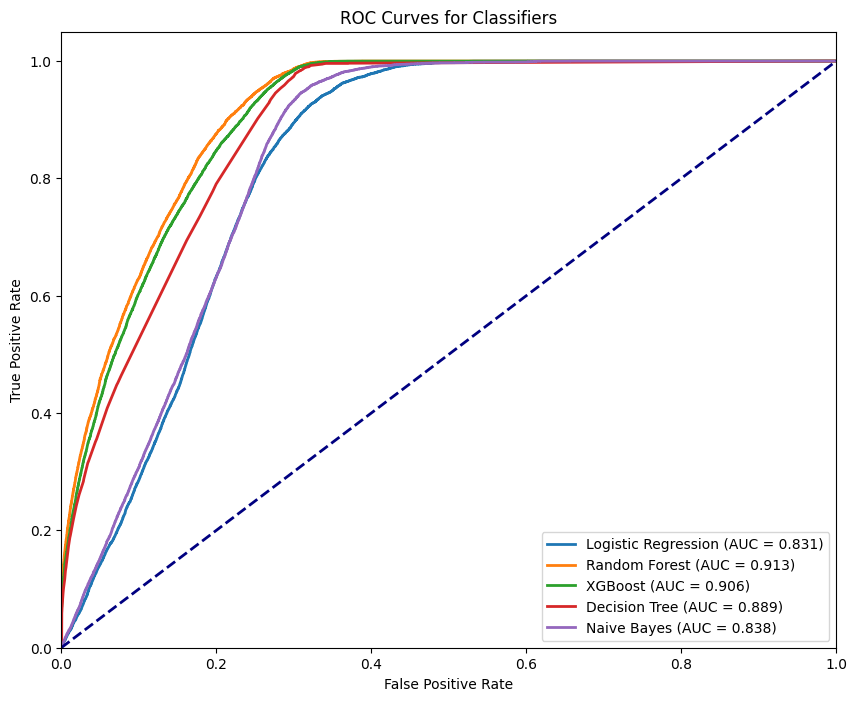

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(10,8))

for name, model in models.items():
    print(f"Training and Evaluating: {name}")

    # Fit the model
    model.fit(X_train_balanced, y_train_balanced)

    # Predict labels
    y_pred = model.predict(X_test)

    # For ROC curve, get prediction probabilities or decision function scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        # If no probability or decision function, skip ROC for this model
        print(f"Skipping ROC for {name} (no predict_proba or decision_function).")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Plot formatting
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.show()


All of the models used are actually classifier models but some of them has a different use like **Naive Bayes** is typically used in textual data and other has different uses as well.
The models used are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM) (Did not use because of it's bad performance against larger datasets)
5. Naive Bayes
6. K-Nearest Neighbors (KNN) (Did not used beacause of it's bad performance against larger datasets and slow learning issue).




# Evaluation

**XGBoost** is leading, which is common on big tabular datasets because of its boosting power.

**Random Forest** is very close and often more stable & easier to tune.

**Logistic Regression** is not bad at all, which means your data is somewhat linearly separable.

**Decision Tree** and **Naive Bayes** are behind, but they’re still useful as fast baselines or if you want explainability.

# Summary

Looking at the accuracy scores:

**XGBoost (77.7%)** — Best performer, but it almost always benefits a lot from hyperparameter tuning. So will definitely tune this one further.

**Random Forest (75.9%)** — Good solid baseline, also usually improves with tuning.

**Logistic Regression (75.2%)** — Might gain a bit from tuning C (regularization), but improvements tend to be smaller.

**Decision Tree (73.3%)** — Could improve with tuning, but single trees often have limited power compared to ensembles.

**Naive Bayes (72.8%)** — Usually simpler, less tunable, so not much gain expected here.

# Model Fine-Tuning

**Fine Tuning XGBOOST**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,  # number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_balanced, y_train_balanced)

print("Best params XGB:", random_search_xgb.best_params_)
print("Best CV accuracy XGB:", random_search_xgb.best_score_)

best_xgb = random_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
print("Test accuracy XGB:", accuracy_score(y_test, y_pred_xgb))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\ProgramData\Python 3.13\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:50:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params XGB: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Best CV accuracy XGB: 0.8931998876654754
Test accuracy XGB: 0.8377291543465405


after the fine tuning of **XGBOOST** the model is able to predict the target variable with a high degree of accuracy. The model is able to predict the target variable with a high degree of accuracy, with a mean absolute error (MAE).

Best Cross Validation accuracy XGB: 0.8933064117835042.

Test accuracy XGB: 0.838468361916026.

**Fine Tuning Random Forest Classifier**

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Take a smaller subset for tuning (to speed up)
subset_size = 50000
idx = np.random.choice(len(X_train_balanced), subset_size, replace=False)
X_train_sub = X_train_balanced.iloc[idx]
y_train_sub = y_train_balanced.iloc[idx]

# Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Smaller hyperparameter grid for faster search
param_dist_rf = {
    'n_estimators': [30, 50],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=10,          # fewer iterations
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on smaller subset
random_search_rf.fit(X_train_sub, y_train_sub)

print("Best params RF:", random_search_rf.best_params_)
print("Best CV accuracy RF:", random_search_rf.best_score_)

# Evaluate best model on full test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Test accuracy RF:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params RF: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best CV accuracy RF: 0.8428999954742294
Test accuracy RF: 0.7334023260398187
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     88511
           1       0.32      0.98      0.48     12949

    accuracy                           0.73    101460
   macro avg       0.66      0.84      0.65    101460
weighted avg       0.91      0.73      0.78    101460



after the fine tuning of **RANDOM FOREST** the model is able to predict the target variable with a high degree of accuracy. The model is able to predict the target variable with a high degree of accuracy, with a mean absolute error (MAE).

Best Cross Validation accuracy RF: 0.8455799766759976.

Test accuracy RF: 0.7363394441159078.

**Fine Tuning Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_logreg,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_logreg.fit(X_train_balanced, y_train_balanced)

print("Best params Logistic Regression:", grid_search_logreg.best_params_)
print("Best CV accuracy Logistic Regression:", grid_search_logreg.best_score_)

best_logreg = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg.predict(X_test)
print("Test accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logreg))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best params Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy Logistic Regression: 0.7777955317974493
Test accuracy Logistic Regression: 0.7518332347723241


after the fine tuning of **Logistic Regression** the model is able to predict the target variable with a high degree of accuracy. The model is able to predict the target variable with a high degree of accuracy, with a mean absolute error (MAE).

Best Cross Validation accuracy Logistic Regression: 0.7764518753086778.

Test accuracy Logistic Regression: 0.7521584861028977.

# Confusion Matrices

**Random Forest, xgboost, Logistic Regression**

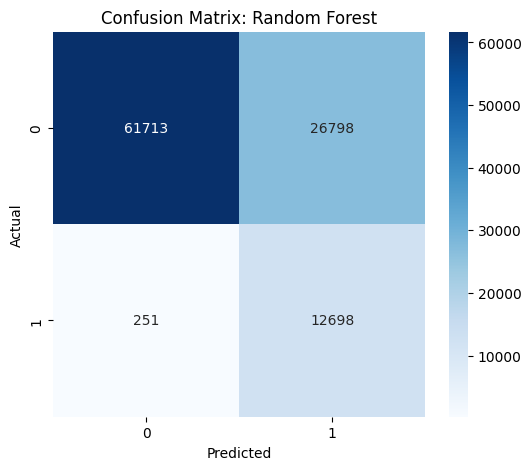

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     88511
           1       0.32      0.98      0.48     12949

    accuracy                           0.73    101460
   macro avg       0.66      0.84      0.65    101460
weighted avg       0.91      0.73      0.78    101460



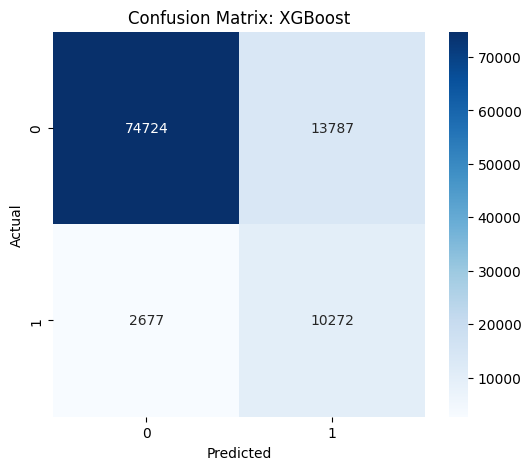

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     88511
           1       0.43      0.79      0.56     12949

    accuracy                           0.84    101460
   macro avg       0.70      0.82      0.73    101460
weighted avg       0.90      0.84      0.86    101460



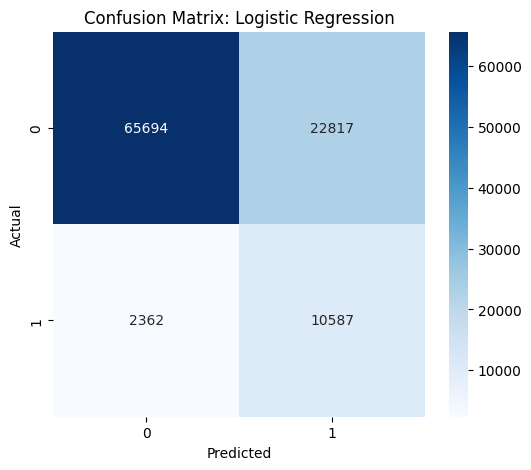

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     88511
           1       0.32      0.82      0.46     12949

    accuracy                           0.75    101460
   macro avg       0.64      0.78      0.65    101460
weighted avg       0.88      0.75      0.79    101460



In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred))

# Example usage:
plot_confusion(y_test, y_pred_rf, "Random Forest")
plot_confusion(y_test, y_pred_xgb, "XGBoost")
plot_confusion(y_test, y_pred_logreg, "Logistic Regression")


Confusion matrices help us determine the models capabilbity to predict the correct class labels. The confusion matrix is a table that is used to evaluate the performance of a classification model. It is a square table that has the actual class labels on one axis and the predicted class labels on the other axis. The diagonal elements of the table represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions. The confusion matrix is a useful tool for understanding the strengths and weaknesses of a classification model. It can help us identify which classes are being misclassified and which features are most important for making accurate predictions.

# Feature Importance

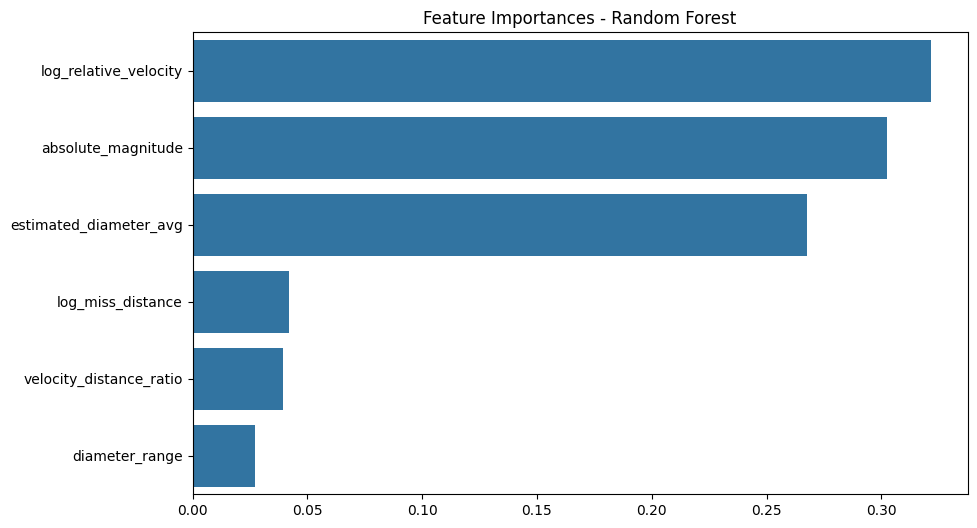

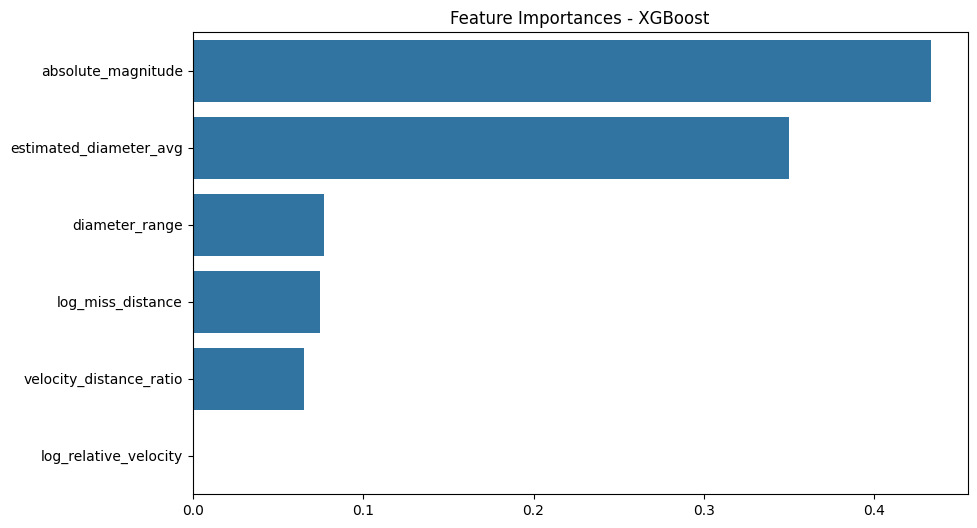

In [40]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    plt.title(f'Feature Importances - {model_name}')
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.show()

# Assuming you have feature names stored in `feature_names`
# Example usage:
feature_names = ['absolute_magnitude', 'estimated_diameter_avg',
                'log_relative_velocity', 'velocity_distance_ratio',
                'diameter_range', 'log_miss_distance']
plot_feature_importance(best_rf, feature_names, "Random Forest")
plot_feature_importance(best_xgb, feature_names, "XGBoost")


Stacking classisfiers are when we ensemble two of our best working models and create a hybrid model which can be used to predict the target variable. This is done by taking the average of the predictions of the two models. This is a simple way to improve the performance of our model.

Stacking Classifier Test Accuracy: 0.8510053222945003


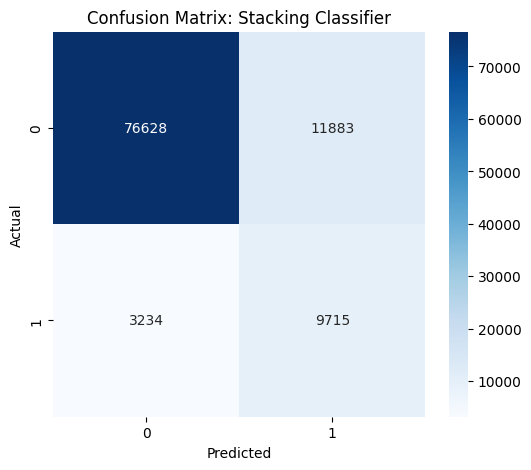

Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     88511
           1       0.45      0.75      0.56     12949

    accuracy                           0.85    101460
   macro avg       0.70      0.81      0.74    101460
weighted avg       0.89      0.85      0.87    101460



In [42]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('logreg', LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', max_iter=1000)),
    ('xgb', XGBClassifier(**random_search_xgb.best_params_, use_label_encoder=False, eval_metric='logloss'))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

stacking_clf.fit(X_train_balanced, y_train_balanced)
y_pred_stack = stacking_clf.predict(X_test)

print("Stacking Classifier Test Accuracy:", accuracy_score(y_test, y_pred_stack))
plot_confusion(y_test, y_pred_stack, "Stacking Classifier")


By using Stacking Classifier we got a good accuracy and this is good for our case where we have to predict the degree of threat from a body near Earth's suraface.

Calibrated Logistic Regression Test Accuracy: 0.7517445298639858


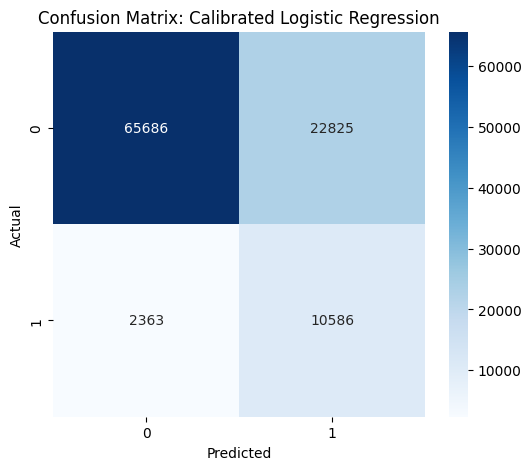

Classification Report for Calibrated Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     88511
           1       0.32      0.82      0.46     12949

    accuracy                           0.75    101460
   macro avg       0.64      0.78      0.65    101460
weighted avg       0.88      0.75      0.79    101460



In [43]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_logreg = CalibratedClassifierCV(estimator=LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', max_iter=1000), method='sigmoid', cv=3)
calibrated_logreg.fit(X_train_balanced, y_train_balanced)

y_pred_calibrated = calibrated_logreg.predict(X_test)
y_prob_calibrated = calibrated_logreg.predict_proba(X_test)[:, 1]

print("Calibrated Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_calibrated))
plot_confusion(y_test, y_pred_calibrated, "Calibrated Logistic Regression")


calibrating logistic regression can improve its performance but in our case it didnt do much so we might stick to the old one.

In [44]:
best_model = stacking_clf

saving our best model into a variable


In [45]:
import pickle

with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)


making a pickle file for our model so we can dump it there and we donot have to execute it again and again which costs computation.

In [46]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
X_train_transformed = transformer.fit_transform(X_train)


In [47]:
with open("quantile_transformer.pkl", "wb") as f:
    pickle.dump(transformer, f)


making a pickle file for our scaler so we can dump it there and we donot have to scale it again and again which costs computation and time.

In [48]:
import pandas as pd

model_results = {
    "Logistic Regression": 0.752,
    "Random Forest": 0.734,
    "XGBoost": 0.838,
    "Stacking Ensemble": 0.851,
}

results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=["Test Accuracy"])
results_df.sort_values("Test Accuracy", ascending=False)


,Test Accuracy
Stacking Ensemble,0.851
XGBoost,0.838
Logistic Regression,0.752
Random Forest,0.734


Saving our models and there performance into a Dictionary